# Machine Learning Model for the Planetary Albedo
## Task 1. Predicting the Lunar Albedo based on Chemical Composition
### 1] Understanding the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

#### Understanding the Albedo_Map

In [2]:
albedo = pd.read_csv("Albedo_Map.csv", header=None)
am = np.asarray(albedo)
print("Range of data values", np.min(am), np.max(am))

Range of data values 0.0968975 0.50656


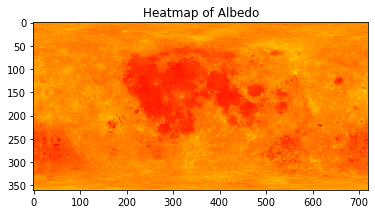

In [3]:
plt.imshow(am, cmap = 'autumn' , interpolation = 'nearest')
plt.title("Heatmap of Albedo")
plt.show()

#### Understanding the Fast_Map 

In [4]:
fast = pd.read_csv("Fast_Map.csv", header=None)
ft = np.asarray(fast)
print("Range of data values", np.min(ft), np.max(ft))

Range of data values 376.23900000000003 499.79


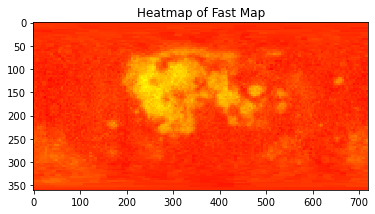

In [5]:
plt.imshow(ft, cmap = 'autumn' , interpolation = 'nearest')
plt.title("Heatmap of Fast Map")
plt.show()

#### Understanding the LPFe_Map

In [6]:
lpfe = pd.read_csv("LPFe_Map.csv", header=None)
fe = np.asarray(lpfe)
print("Range of data values", np.min(fe), np.max(fe))

Range of data values 0.0 23.9018


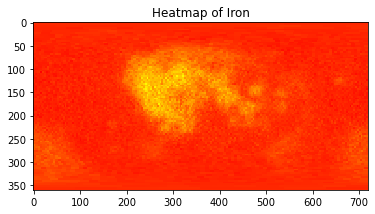

In [7]:
plt.imshow(fe, cmap = 'autumn' , interpolation = 'nearest')
plt.title("Heatmap of Iron")
plt.show()

#### Understanding the LPK_Map

In [8]:
lpk = pd.read_csv("LPK_Map.csv", header=None)
k = np.asarray(lpk)
print("Range of data values", np.min(k), np.max(k))

Range of data values 0.0 4356.4


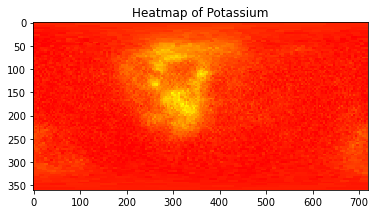

In [9]:
plt.imshow(k, cmap = 'autumn' , interpolation = 'nearest')
plt.title("Heatmap of Potassium")
plt.show()

#### Understanding the LPTh_Map

In [10]:
lpth = pd.read_csv("LPTh_Map.csv", header=None)
th = np.asarray(lpth)
print("Range of data values", np.min(th), np.max(th))

Range of data values 0.003663 11.644


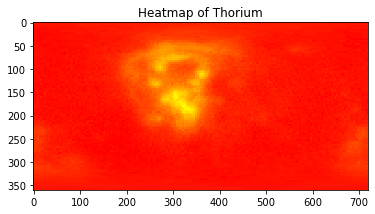

In [11]:
plt.imshow(th, cmap = 'autumn' , interpolation = 'nearest')
plt.title("Heatmap of Thorium")
plt.show()

#### Understanding the LPTi_Map

In [12]:
lpti = pd.read_csv("LPTi_Map.csv", header=None)
ti = np.asarray(lpti)
print("Range of data values", np.min(ti), np.max(ti))

Range of data values 0.0 7.18792


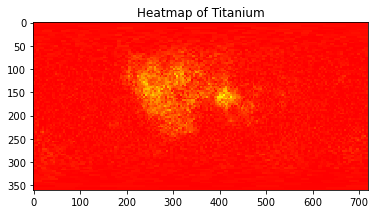

In [13]:
plt.imshow(ti, cmap = 'autumn' , interpolation = 'nearest')
plt.title("Heatmap of Titanium")
plt.show()

#### Understanding the Therm_Map

In [14]:
therm = pd.read_csv("Therm_Map.csv", header=None)
thm = np.asarray(therm)
print("Range of data values", np.min(thm), np.max(thm))

Range of data values 227.915 761.529


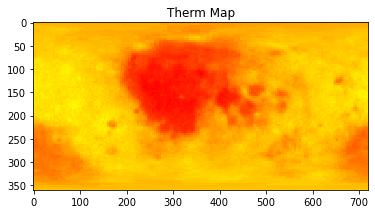

In [15]:
plt.imshow(thm, cmap = 'autumn' , interpolation = 'nearest')
plt.title("Therm Map")
plt.show()

#### The above heatmaps suggest that the datasets are matching with each other and are thus verified for further understanding and processing.

### 2] Spliting the dataset
#### Left and Right hallf

In [16]:
albedo_left = albedo.iloc[:,:360].values
albedo_right = albedo.iloc[:,360:].values
am_left = np.asarray(albedo_left)
am_left = am_left.reshape(129600,1)
am_right = np.asarray(albedo_right)
am_right = am_right.reshape(129600,1)

In [17]:
fast_left = fast.iloc[:,:360].values
fast_right = fast.iloc[:,360:].values
ft_left = np.asarray(fast_left)
ft_left = ft_left.reshape(129600,1)
ft_right = np.asarray(fast_right)
ft_right = ft_right.reshape(129600,1)

In [18]:
lpfe_left = lpfe.iloc[:,:360].values
lpfe_right = lpfe.iloc[:,360:].values
fe_left = np.asarray(lpfe_left)
fe_left = fe_left.reshape(129600,1)
fe_right = np.asarray(lpfe_right)
fe_right = fe_right.reshape(129600,1)

In [19]:
lpk_left = lpk.iloc[:,:360].values
lpk_right = lpk.iloc[:,360:].values
k_left = np.asarray(lpk_left)
k_left = k_left.reshape(129600,1)
k_right = np.asarray(lpk_right)
k_right = k_right.reshape(129600,1)

In [20]:
lpth_left = lpth.iloc[:,:360].values
lpth_right = lpth.iloc[:,360:].values
th_left = np.asarray(lpth_left)
th_left = th_left.reshape(129600,1)
th_right = np.asarray(lpth_right)
th_right = th_right.reshape(129600,1)

In [21]:
lpti_left = lpti.iloc[:,:360].values
lpti_right = lpti.iloc[:,360:].values
ti_left = np.asarray(lpti_left)
ti_left = ti_left.reshape(129600,1)
ti_right = np.asarray(lpti_right)
ti_right = ti_right.reshape(129600,1)

In [22]:
therm_left = therm.iloc[:,:360].values
therm_right = therm.iloc[:,360:].values
thm_left = np.asarray(therm_left)
thm_left = thm_left.reshape(129600,1)
thm_right = np.asarray(therm_right)
thm_right = thm_right.reshape(129600,1)

### 3] Combining the datasets in single dataset
#### Since, only the element concentration maps should be used to predict the albedo map, the therm and fast map data is not considered. 

In [23]:
# Left half
left = np.concatenate((fe_left, k_left, th_left, ti_left, am_left),axis=1)
left = pd.DataFrame(left, columns = ['LPFe', 'LPK', 'LPTh', 'LPTi', 'Albedo'])

In [24]:
# Right half
right = np.concatenate((fe_right, k_right, th_right, ti_right, am_right),axis=1)
right = pd.DataFrame(right, columns = ['LPFe', 'LPK', 'LPTh', 'LPTi', 'Albedo'])

In [25]:
# Full dataset
df = np.concatenate((left,right),axis=0)
df = pd.DataFrame(df, columns = ['LPFe', 'LPK', 'LPTh', 'LPTi', 'Albedo'])
df.corr()

,LPFe,LPK,LPTh,LPTi,Albedo
LPFe,1.000000,0.691200,0.725192,0.804646,-0.811343
LPK,0.691200,1.000000,0.937672,0.554363,-0.548442
LPTh,0.725192,0.937672,1.000000,0.591886,-0.574907
LPTi,0.804646,0.554363,0.591886,1.000000,-0.683682
Albedo,-0.811343,-0.548442,-0.574907,-0.683682,1.000000


### 4] Relationship between Variables 

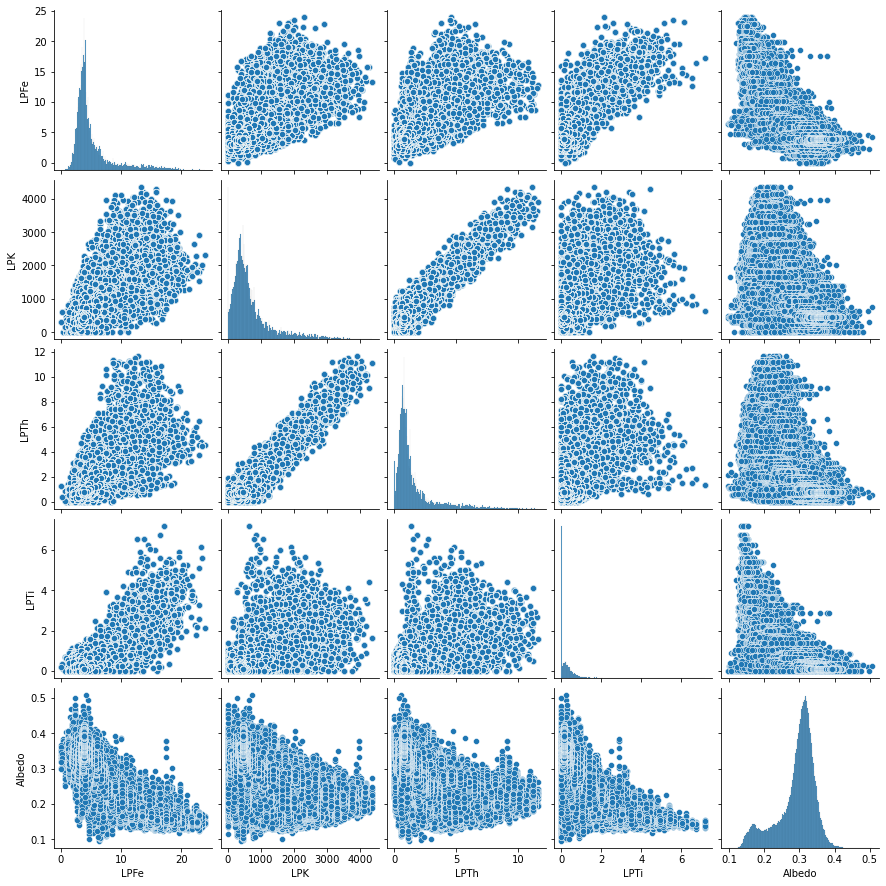

In [26]:
df = df[['LPFe', 'LPK', 'LPTh', 'LPTi', 'Albedo']]
sns.pairplot(df, kind="scatter")
plt.show()

The above plots show that there in no linear co-relation. 

### 5] Spliting data in independent and dependent variables

In [27]:
x_left = left.iloc[:, :-1].values
y_left = left.iloc[:, 4].values

In [28]:
x_right = right.iloc[:, :-1].values
y_right = right.iloc[:, 4].values

### 6] Applying Feature Scaling 
#### Consiedering right as test set 

In [29]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_left = sc_x.fit_transform(x_left)
x_right = sc_x.transform(x_right)

### 7] Support Vector Regression Model
##### Since, there are no categorical variables in the dataset SVR will not create a bias and might produce more accurate results. 

In [30]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_left, y_left)

SVR()

In [31]:
y_predict = regressor.predict(x_right)
#y_predict = sc_y.inverse_transform(y_predredict) 

In [32]:
from sklearn.metrics import r2_score
r2 = r2_score(y_right, y_predict)
print(r2)

0.5126593804625719


In [33]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_right, y_predict)
print(mae)

0.025667916023180484


In [34]:
residue = y_right-y_predict
yr = y_right.reshape(129600,1)
yp = y_predict.reshape(129600,1)
re = residue.reshape(129600,1)

### 8] Output Visualization  

#### 1D Histogram of Actual, Predicted, Residual 

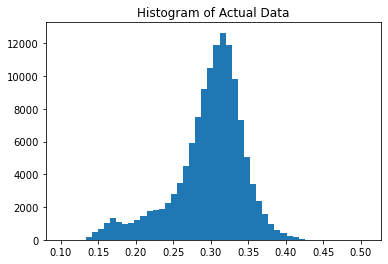

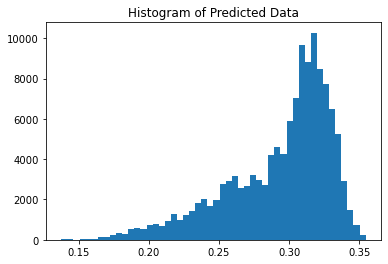

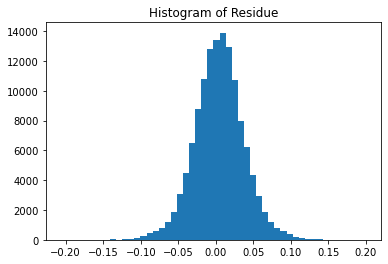

In [35]:
plt.hist(yr, bins=50)
plt.title("Histogram of Actual Data")
plt.show()
plt.hist(yp, bins=50)
plt.title("Histogram of Predicted Data")
plt.show()
plt.hist(re, bins=50)
plt.title("Histogram of Residue")
plt.show()

In [36]:
yr = y_right.reshape(360,360)
yp = y_predict.reshape(360,360)
re = residue.reshape(360,360)

#### 2D Image of Actual, Predicted, Residual 

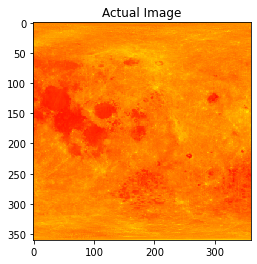

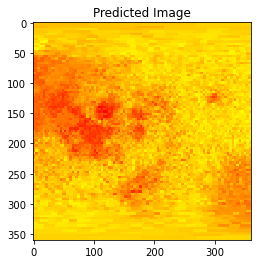

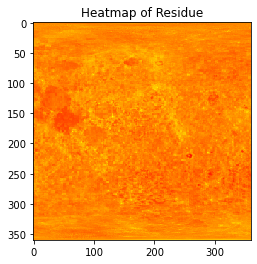

In [37]:
plt.imshow(yr, cmap = 'autumn' , interpolation = 'nearest')
plt.title("Actual Image")
plt.show()
plt.imshow(yp, cmap = 'autumn' , interpolation = 'nearest')
plt.title("Predicted Image")
plt.show()
plt.imshow(re, cmap = 'autumn' , interpolation = 'nearest')
plt.title("Heatmap of Residue")
plt.show()